Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment

In [141]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [142]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [143]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [144]:
# Listing the column values
df.columns.tolist()

['id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

Dummification of the categorical values

In [145]:
data_ = pd.get_dummies(data = df, columns=['preferred_foot', 'attacking_work_rate','defensive_work_rate'])
data_.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,...,0,0,0,0,0,0,1,0,0,0


In [146]:
data_.columns.tolist()

['id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'preferred_foot_left',
 'preferred_foot_right',
 'attacking_work_rate_None',
 'attacking_work_rate_high',
 'attacking_work_rate_le',
 'attacking_work_rate_low',
 'attacking_work_rate_medium',
 'attacking_work_rate_norm',
 'attacking_work_rate_stoc',
 'attacking_work_rate_y',
 'defensive_work_rate_0',
 'defensive_work_rate_1',
 'defensive_work_rate_2',
 'defensive_work_rate_3',
 'defensive_work_rate_4',


In [147]:
import statsmodels.formula.api as smf
lm = LinearRegression()
lm = smf.ols(formula='overall_rating ~ id + player_fifa_api_id + player_api_id +  potential + crossing + finishing + heading_accuracy + short_passing + volleys + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + preferred_foot_left + preferred_foot_right + attacking_work_rate_None + attacking_work_rate_high + attacking_work_rate_le + attacking_work_rate_low + attacking_work_rate_medium + attacking_work_rate_norm + attacking_work_rate_stoc + attacking_work_rate_y + defensive_work_rate_0 + defensive_work_rate_1 + defensive_work_rate_2 + defensive_work_rate_3 + defensive_work_rate_4 + defensive_work_rate_5 + defensive_work_rate_6 + defensive_work_rate_7 + defensive_work_rate_8 + defensive_work_rate_9 + defensive_work_rate__0 + defensive_work_rate_ean + defensive_work_rate_es + defensive_work_rate_high + defensive_work_rate_low + defensive_work_rate_medium + defensive_work_rate_o + defensive_work_rate_ormal + defensive_work_rate_tocky', data=data_).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.893e+04
Date:                Thu, 14 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:02:05   Log-Likelihood:            -4.3225e+05
No. Observations:              181265   AIC:                         8.646e+05
Df Residuals:                  181205   BIC:                         8.652e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0703      0.067      1.055      0.292      -0.060       0.201
id                          1.701e-07   1.17e-07      1.460      0.144   -5.82e-08    3.98e-07
player_fifa_api_id         -8.683e-06   1.52e-07    -57.089      0.000   -8.98e-06   -8.38e-06
player_api_id              -6.333e-06   6.14e-08   -103.193      0.000   -6.45e-06   -6.21e-06
potential                      0.4455      0.001    305.400      0.000       0.443       0.448
crossing                       0.0066      0.001      8.221      0.000       0.005       0.008
finishing                      0.0151      0.001     17.395      0.000       0.013       0.017
heading_accuracy               0.0561      0.001     72.340      0.000       0.055       0.058
short_passing                  0.0561      0.001     43.183      0.000       0.054       0.059
volleys                       -0.0069      0.001     -8.812      0.000      -0.008      -0.005
dribbling                      0.0096      0.001      8.697      0.000       0.007       0.012
curve                          0.0115      0.001     15.171      0.000       0.010       0.013
free_kick_accuracy             0.0082      0.001     12.142      0.000       0.007       0.009
long_passing                   0.0102      0.001     11.487      0.000       0.008       0.012
ball_control                   0.1130      0.002     75.285      0.000       0.110       0.116
acceleration                   0.0112      0.001      8.601      0.000       0.009       0.014
sprint_speed                   0.0163      0.001     13.218      0.000       0.014       0.019
agility                       -0.0114      0.001    -11.900      0.000      -0.013      -0.010
reactions                      0.1758      0.001    168.250      0.000       0.174       0.178
balance                        0.0045      0.001      6.119      0.000       0.003       0.006
shot_power                     0.0130      0.001     15.739      0.000       0.011       0.015
jumping                        0.0113      0.001     16.475      0.000       0.010       0.013
stamina                       -0.0017      0.001     -2.195      0.028      -0.003      -0.000
strength                       0.0502      0.001     63.330      0.000       0.049       0.052
long_shots                    -0.0113      0.001    -13.117      0.000      -0.013      -0.010
aggression                     0.0112      0.001     17.175      0.000       0.010       0.012
interceptions                  0.0033      0.001      4.704      0.000       0.002       0.005
positioning                   -0.0060      0.001     -8.092      0.000      -0.007      -0.005
vision                        -0.0174      0.001    -20.917      0.000      -0.019      -0.016
penalties                      0.0082      

In [148]:
import numpy as np

In [149]:
np.min(df.overall_rating)

33.0

In [150]:
np.max(df.overall_rating)

94.0

In [151]:
np.mean(df.overall_rating)

68.6000152886831

In [152]:
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

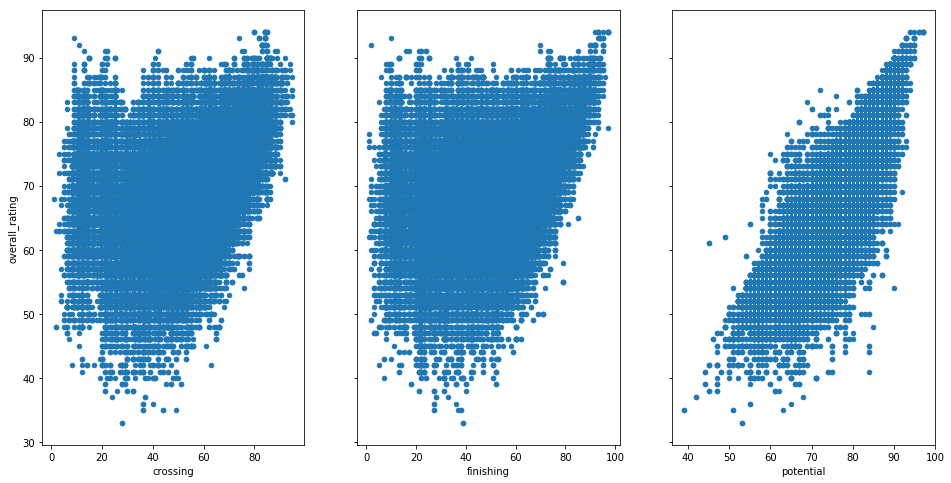

In [153]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='crossing', y='overall_rating', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='finishing', y='overall_rating', ax=axs[1])
df.plot(kind='scatter', x='potential', y='overall_rating', ax=axs[2])

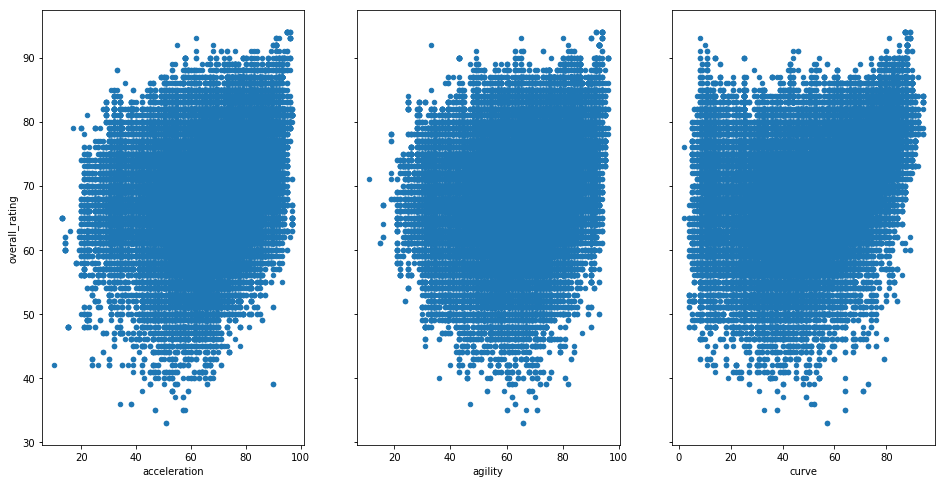

In [154]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='acceleration', y='overall_rating', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='agility', y='overall_rating', ax=axs[1])
df.plot(kind='scatter', x='curve', y='overall_rating', ax=axs[2])

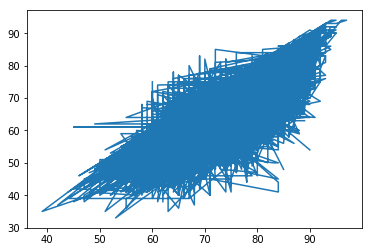

In [155]:
plt.plot(data_.potential, data_.overall_rating)
plt.show()

In [163]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='overall_rating ~ id + player_fifa_api_id + player_api_id + potential + heading_accuracy + short_passing + volleys + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + preferred_foot_left + preferred_foot_right + attacking_work_rate_None + attacking_work_rate_high + attacking_work_rate_le + attacking_work_rate_low + attacking_work_rate_medium + attacking_work_rate_norm + attacking_work_rate_stoc + attacking_work_rate_y + defensive_work_rate_0 + defensive_work_rate_1 + defensive_work_rate_2 + defensive_work_rate_3 + defensive_work_rate_4 + defensive_work_rate_5 + defensive_work_rate_6 + defensive_work_rate_7 + defensive_work_rate_8 + defensive_work_rate_9 + defensive_work_rate__0 + defensive_work_rate_ean + defensive_work_rate_es + defensive_work_rate_high + defensive_work_rate_low + defensive_work_rate_medium + defensive_work_rate_o + defensive_work_rate_ormal + defensive_work_rate_tocky', data=data_).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.955e+04
Date:                Thu, 14 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:05:22   Log-Likelihood:            -4.3243e+05
No. Observations:              181265   AIC:                         8.650e+05
Df Residuals:                  181207   BIC:                         8.656e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.1288      0.067      1.935      0.053      -0.002       0.259
id                          1.612e-07   1.17e-07      1.382      0.167   -6.74e-08     3.9e-07
player_fifa_api_id         -8.726e-06   1.52e-07    -57.505      0.000   -9.02e-06   -8.43e-06
player_api_id              -6.361e-06   6.12e-08   -103.893      0.000   -6.48e-06   -6.24e-06
potential                      0.4444      0.001    305.772      0.000       0.442       0.447
heading_accuracy               0.0578      0.001     75.487      0.000       0.056       0.059
short_passing                  0.0568      0.001     43.896      0.000       0.054       0.059
volleys                       -0.0032      0.001     -4.295      0.000      -0.005      -0.002
dribbling                      0.0147      0.001     13.812      0.000       0.013       0.017
curve                          0.0124      0.001     16.818      0.000       0.011       0.014
free_kick_accuracy             0.0084      0.001     12.564      0.000       0.007       0.010
long_passing                   0.0103      0.001     11.713      0.000       0.009       0.012
ball_control                   0.1134      0.002     75.467      0.000       0.110       0.116
acceleration                   0.0115      0.001      8.861      0.000       0.009       0.014
sprint_speed                   0.0171      0.001     13.849      0.000       0.015       0.019
agility                       -0.0117      0.001    -12.237      0.000      -0.014      -0.010
reactions                      0.1765      0.001    168.899      0.000       0.174       0.179
balance                        0.0043      0.001      5.819      0.000       0.003       0.006
shot_power                     0.0136      0.001     16.454      0.000       0.012       0.015
jumping                        0.0113      0.001     16.373      0.000       0.010       0.013
stamina                       -0.0015      0.001     -1.918      0.055      -0.003    3.25e-05
strength                       0.0501      0.001     63.142      0.000       0.049       0.052
long_shots                    -0.0076      0.001     -9.030      0.000      -0.009      -0.006
aggression                     0.0106      0.001     16.261      0.000       0.009       0.012
interceptions                  0.0030      0.001      4.351      0.000       0.002       0.004
positioning                   -0.0032      0.001     -4.370      0.000      -0.005      -0.002
vision                        -0.0169      0.001    -20.377      0.000      -0.019      -0.015
penalties                      0.0096      0.001     13.621      0.000       0.008       0.011
marking                        0.0260      0.001     24.627      0.000       0.024       0.028
standing_tackle                0.0059      

In [164]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='overall_rating ~ player_fifa_api_id + player_api_id + potential + crossing + finishing +  curve + acceleration + agility + heading_accuracy + short_passing + volleys + dribbling +  free_kick_accuracy + long_passing + ball_control +  sprint_speed +  balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle +  gk_diving +   preferred_foot_right + attacking_work_rate_low + defensive_work_rate_1 + defensive_work_rate__0 + defensive_work_rate_ean + defensive_work_rate_o + defensive_work_rate_low', data=data_).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 2.318e+04
Date:                Thu, 14 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:05:24   Log-Likelihood:            -4.5043e+05
No. Observations:              181265   AIC:                         9.009e+05
Df Residuals:                  181226   BIC:                         9.013e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0438      0.103     -0.425      0.671      -0.246       0.158
player_fifa_api_id      -8.673e-06   1.66e-07    -52.094      0.000      -9e-06   -8.35e-06
player_api_id           -7.864e-06   6.54e-08   -120.317      0.000   -7.99e-06   -7.74e-06
potential                   0.5154      0.001    351.069      0.000       0.513       0.518
crossing                    0.0093      0.001     10.491      0.000       0.008       0.011
finishing                   0.0229      0.001     23.891      0.000       0.021       0.025
curve                       0.0193      0.001     23.208      0.000       0.018       0.021
acceleration                0.0140      0.001      9.710      0.000       0.011       0.017
agility                     0.0037      0.001      3.480      0.001       0.002       0.006
heading_accuracy            0.0614      0.001     73.020      0.000       0.060       0.063
short_passing               0.0769      0.001     54.121      0.000       0.074       0.080
volleys                    -0.0036      0.001     -4.158      0.000      -0.005      -0.002
dribbling                   0.0121      0.001      9.957      0.000       0.010       0.015
free_kick_accuracy          0.0060      0.001      8.075      0.000       0.005       0.007
long_passing                0.0016      0.001      1.669      0.095      -0.000       0.004
ball_control                0.1342      0.002     82.273      0.000       0.131       0.137
sprint_speed                0.0079      0.001      5.773      0.000       0.005       0.011
balance                    -0.0016      0.001     -1.957      0.050      -0.003     2.7e-06
shot_power                  0.0173      0.001     19.039      0.000       0.016       0.019
jumping                     0.0228      0.001     30.084      0.000       0.021       0.024
stamina                     0.0035      0.001      4.141      0.000       0.002       0.005
strength                    0.0594      0.001     67.917      0.000       0.058       0.061
long_shots                 -0.0100      0.001    -10.456      0.000      -0.012      -0.008
aggression                  0.0294      0.001     41.431      0.000       0.028       0.031
interceptions              -0.0011      0.001     -1.484      0.138      -0.003       0.000
positioning                -0.0099      0.001    -12.334      0.000      -0.012      -0.008
vision                     -0.0182      0.001    -19.943      0.000      -0.020      -0.016
penalties                   0.0024      0.001      3.045      0.002       0.001       0.004
marking                     0.0229      0.001     19.581      0.000       0.021       0.025
standing_tackle             0.0152      0.001     11.334      0.000       0.013       0.018
sliding_tackle             -0.0192      0.001  

In [165]:
# Fill NAN values using 0
data_.fillna(0, inplace=True)

In [166]:
# Splitting the entire dataset using train & test datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = data_[['player_fifa_api_id','player_api_id','potential','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed','agility','reactions','balance','shot_power','jumping','stamina','strength','long_shots','aggression','interceptions','positioning','vision','penalties','marking','standing_tackle','sliding_tackle', 'gk_diving','preferred_foot_left','preferred_foot_right','attacking_work_rate_low', 'defensive_work_rate_1', 'defensive_work_rate__0', 'defensive_work_rate_ean', 'defensive_work_rate_o', 'defensive_work_rate_low']]
Y = data_['overall_rating']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =12312)

In [167]:
lm = LinearRegression()

In [168]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [169]:
pred_linear = lm.predict(X_test)

In [170]:
#Displaying the predicted overall_rating of the soccer players.
pred_linear[:5]

array([ 60.02558562,  63.39032283,  66.53278433,  64.90005104,  68.97827334])

In [171]:
from sklearn.metrics import r2_score, recall_score

In [172]:
r2_score(Y_test, pred_linear)

0.90059228334423724

In [173]:
# Fiiting the linear regression model against entire datasets.
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
lm.predict(X)[0:5]

array([ 59.10541403,  59.10541403,  56.96746374,  55.82461777,  55.82461777])

In [175]:
r2_score(Y, lm.predict(X))

0.89886000288585644

In [176]:
lm.coef_

array([ -7.30555222e-06,  -5.95911993e-06,   4.35775919e-01,
         6.34472789e-03,   1.58665403e-02,   5.42728936e-02,
         5.06889156e-02,  -7.23936992e-03,   1.51406783e-02,
         1.37931924e-02,   4.91140211e-03,   1.19862808e-02,
         1.12847471e-01,   7.96313077e-03,   1.05477316e-02,
        -5.67385349e-03,   1.87560371e-01,   4.25393320e-03,
         1.77988633e-02,   1.54863453e-02,   4.72037399e-04,
         5.25690024e-02,  -1.04367372e-02,   1.50740180e-02,
        -6.94336871e-03,  -1.54606395e-02,  -1.68332902e-02,
         3.90279116e-03,   2.26755876e-02,   1.32787463e-02,
        -1.86374103e-02,   2.01844539e-01,  -9.33634441e-01,
        -9.23878027e-01,   9.81664053e-01,   8.29448771e-01,
        -1.62464784e+00,  -1.68679944e+00,  -1.00745363e+00,
         4.15609102e-01])

In [177]:
len(lm.coef_)

40

In [178]:
# List down all the coefficients against all the features of the players.
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,player_fifa_api_id,-0.000007
1,player_api_id,-0.000006
2,potential,0.435776
3,crossing,0.006345
4,finishing,0.015867
5,heading_accuracy,0.054273
6,short_passing,0.050689
7,volleys,-0.007239
8,dribbling,0.015141
9,curve,0.013793


#### There is high correlation b/w overall_rating & potential

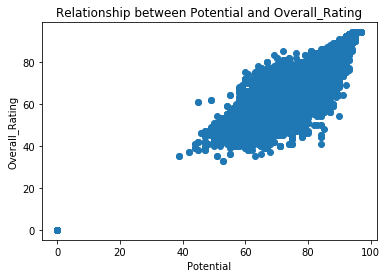

In [179]:
plt.scatter(data_.potential, data_.overall_rating)
plt.xlabel("Potential")
plt.ylabel("Overall_Rating")
plt.title("Relationship between Potential and Overall_Rating")
plt.show()

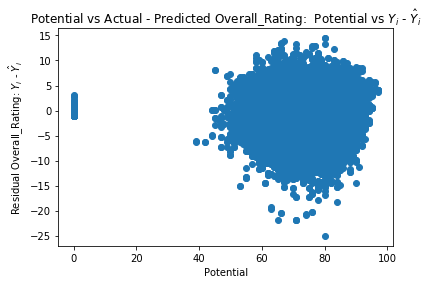

In [180]:
plt.scatter(data_.potential, data_.overall_rating - lm.predict(X))
plt.xlabel("Potential")
plt.ylabel("Residual Overall_Rating: $Y_i$ - $\hat{Y}_i$")
plt.title("Potential vs Actual - Predicted Overall_Rating:  Potential vs $Y_i$ - $\hat{Y}_i$")
plt.show()

Here the errors are hetroscadastic and since no pattern can be observed
hence we can consider this factor which impacts the overall-rating 
of the soccer players

#### Conclusion:
    1. Fetching the players attributes from the database using sqlite.
    2. Since thr r 3 categorical columns in the records, so we need to 
        dummify the columns so that we get the binary values for the dummified 
        columns.
    3. Visualize the relationship b/w some of the features and response using scatterplots.    
    4. Created the Linear Regression Model & then taking out the summary from all 
        the columns including the dumified columns. 
    5. Comparing the R-squared & Adjusted R-squared values & other parameters like
        F-statistics, P>(t) using variable number of columns from the database and
        whichever combination of the attributes is giving best of the above values 
        will be further considered for future testing.
    6. Applying the linear regression model over the train & test datasets using the
        above attributes.
    7. Predicting the linear test data and calculating the accuracy score of test data
        and predicted data and getting more than 90% which is a good accuracy score.
        Hence I have listed down the predicted values of the overall_rating of the players.
    8. Now fitting the Linear Regression model over the complete data sets and predicted the 
        overall_rating of the soccer players and accuracy score is around 89.88 which is almost 
        equivalent to that of train & test datasets.
    9. Taken the list of coefficients along with the features have been list down
        which states that potential feature has the higher coefficients compared to all the features
        affecting the overall_rating of the soccer players.
    10. Hence plotted the graph of the overall_rating of the soccer players against the potential attributes
        and find the points are closely scattered along the line of Best fit.
    11. Now plotted the graph against the error - "Residual Overall_Rating: Y - hat{Y}" and 
        potential. The graph is hetroscadastic in nature and since no pattern can be observed 
        hence we can consider this factor impacts the overall-rating of the soccer players.
    